##1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

##2. Load the dataset and analyse it

In [2]:
data = sns.load_dataset("iris")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
unique_target_values = pd.unique(data["species"])
unique_target_values

array(['setosa', 'versicolor', 'virginica'], dtype=object)

##3. Transform the data and split it into train and test sets

In [4]:
label_encoder = LabelEncoder()

X = data.drop(columns="species")
y = label_encoder.fit_transform(data["species"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##4. EDA and data engineering

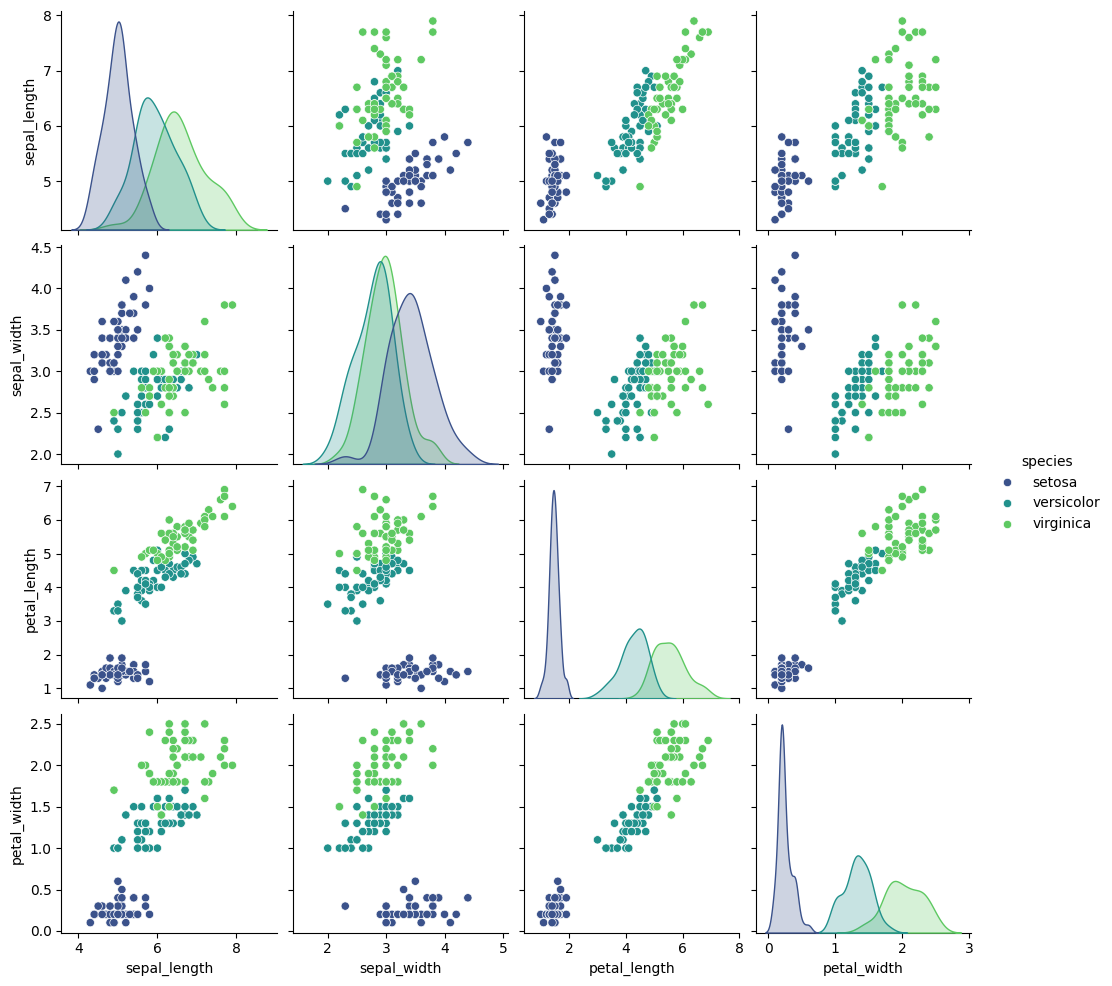

In [5]:
sns.pairplot(data, hue="species", palette="viridis", diag_kind="kde")

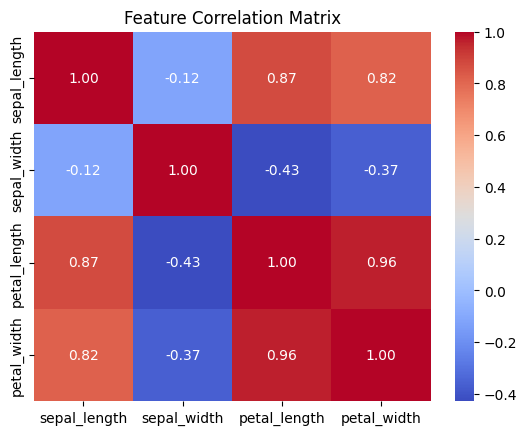

In [6]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

The correlation matrix tells us there are many features correlated to each other, in particular:

1.   petal length and petal width (96 %)
2.   sepal length and sepal width (87 %)

Let's create a few graphs to verify their correlation!

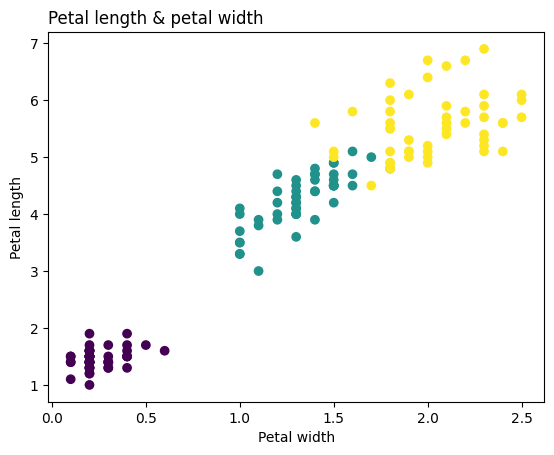

In [7]:
plt.scatter(X["petal_width"], X["petal_length"], c=y)
plt.xlabel("Petal width")
plt.ylabel("Petal length")
plt.title("Petal length & petal width", loc="left")
plt.show()

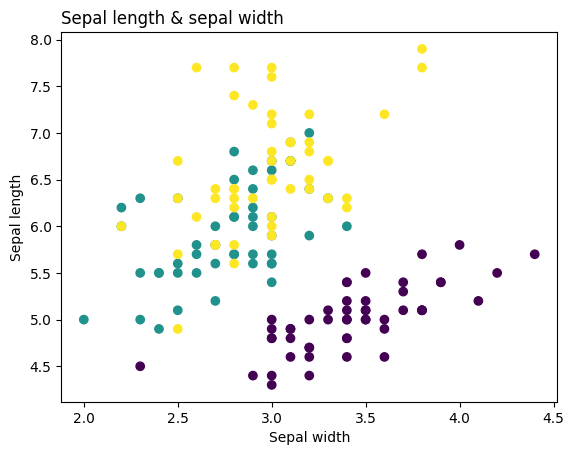

In [8]:
plt.scatter(X["sepal_width"],X["sepal_length"],c=y)
plt.xlabel("Sepal width")
plt.ylabel("Sepal length")
plt.title("Sepal length & sepal width", loc="left")
plt.show()

Let's now create an improved dataset based on these correlations, and test the performance on different models.

In [9]:
improved_data = pd.DataFrame()

improved_data["petal_w/petal_l"] = X["petal_width"] / X["petal_length"]
improved_data["sepal_w/sepal_l"] = X["sepal_width"] / X["sepal_length"]
improved_data["target"] = y

improved_data.head()

,petal_w/petal_l,sepal_w/sepal_l,target
0,0.142857,0.686275,0
1,0.142857,0.612245,0
2,0.153846,0.680851,0
3,0.133333,0.673913,0
4,0.142857,0.720000,0


##5. Evaluate on the improved data

In [10]:
def fit(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_preds_train = model.predict(X_train)
  y_preds_test = model.predict(X_test)
  train_score = accuracy_score(y_train, y_preds_train)
  test_score = accuracy_score(y_test, y_preds_test)

  print("{}: \n\tTrain_score: {:.2f}\n\tTest score: {:.2f}\n".format(model, train_score, test_score))


decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boost = GradientBoostingClassifier(random_state=42)
ada_boost = AdaBoostClassifier(random_state=42)


X_new = improved_data.drop(columns="target")
y_new = improved_data["target"]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

for model in [decision_tree, random_forest, gradient_boost, ada_boost]:
  fit(model, X_train, X_test, y_train, y_test)

DecisionTreeClassifier(random_state=42): 
	Train_score: 1.00
	Test score: 1.00

RandomForestClassifier(random_state=42): 
	Train_score: 1.00
	Test score: 1.00

GradientBoostingClassifier(random_state=42): 
	Train_score: 1.00
	Test score: 1.00

AdaBoostClassifier(random_state=42): 
	Train_score: 1.00
	Test score: 0.93



As we can see from the results, almost all models perform exceptionally well on both the training and test sets, indicating that not only are these models powerful, but also that the dataset we are working with is relatively simple.